<h1 align="center"> Coffee Machine </h1>


In [ ]:
Baza = {
   "mavjud_pullar" : {
    "10000" : 10,
    "5000" : 10,
    "2000" : 10,
    "1000" : 10,
    "500" : 10,   
},
    
    "coffee" : {
    "1" : ["Espresso",5000,10],
    "2" : ["Flat_White",3500,10],
    "3" : ["Caffe_Americano",6000,10],
    "4" : ["Turkish_Coffee",4500,10],
    "5" : ["Espresso_Romano",7000,10],
    "6" : ["Latte",3000,10],
    "7" : ["Vienna",5500,10],
    "8" : ["Affogato",6500,10],
    "9" : ["Macchiato",10000,10],
    "10" : ["Mochaccino",9500,10],
    "11" : ["Lungo",4000,10],
    "12" : ["Red_Eye",12000,10],
    "13" : ["Black_Eye",12500,10],
    "14" : ["Cafe_Cubano",3000,10],
    "15" : ["Cappuccino",8000,10],
    "16" : ["Irish_Coffee",7000,10],
    "17" : ["Frappe",9000,10],
    "18" : ["Long_Black",5000,10],
    "19" : ["Mazagran",4000,10],
    "20" : ["Shakerato",7500,10],
    "21" : ["Palazzo",5500,10],
    "22" : ["Carajillo",7000,10],
    "23" : ["Suv",500,10]
}
}
pul_baza = Baza["mavjud_pullar"]
cof_baza = Baza['coffee']
global pul_baza
global cof_baza

In [ ]:
#                <------------------- Coffee mashinasi funksiyalari ------------------->              #

#-----------------------------------------------------------------------------------------------
# kofe bor yoki yo'ligini tekshirish

def coffeeni_tekshirish(cof_id):
    if cof_baza[str(cof_id)][2]>0:
        return True
    else:
        return False
    
#------------------------------------------------------------------------------------------------
# menu funksiyasi

def cm_to_inch(value):
    return value / 2.54

def menu():
    import cv2 as cv
    import matplotlib.pyplot as plt

    img = cv.imread('Types-of-Coffee.jpg')
    plt.figure(figsize=(cm_to_inch(40), cm_to_inch(40)))
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)) 
    plt.show()
    
    flag = True
    for i in range(len(cof_baza)):
        if coffeeni_tekshirish(i+1): 
            flag = False
            print(i+1," : ", cof_baza[str(i+1)][0], " - ",cof_baza[str(i+1)][1], " so'm " ,sep="" )
    if flag:
        print("Coffee qolmagan")
        return False
    return True
#-----------------------------------------------------------------------------------------------       
    
# coffee narxini tekshirish

def price(cof_id):
    return cof_baza[str(cof_id)][1]

#------------------------------------------------------------------------------------------------

# haridordan pulni qabul qilish

def pul_sorash(naxri):    
    pullar = Baza["mavjud_pullar"]
    haridor_puli = 0; s = 0
    for i in pullar.keys():
        haridor_puli = int(input(f"{i} so'mlikdan nechta pul kitirmoqchisiz : "))
        s += haridor_puli * int(i)
        pullar[str(i)] += haridor_puli
        if s >= naxri:
            break
    return s
#-----------------------------------------------------------------------------------------------   

# kassir

def kassir(haridor_puli, cof_id):
    if haridor_puli >= price(cof_id):
        return True
    elif price(cof_id) != haridor_puli:
        return False
    
    
#------------------------------------------------------------------------------------------------

# ortiqcha pulga takliflar

def ortiqcha_pulga_takliflar(haridor_puli):
    for i in range(1,24):
        if not coffeeni_tekshirish(i):
            continue
            
        if haridor_puli >= price(i):
            print(i, ": Ortgan pulinggizga",cof_baza[str(i)][0] ," berishimiz mumki")
            
        elif haridor_puli < price(i):
            print(i, "yana", price(i)-haridor_puli , "so'm qo'shsangiz", cof_baza[str(i)][0], "berishimiz mumkin")
            
    cof_id = int(input("Yuqoridagi variantlardan bittasini tanlang : "))
    
    return cof_id
#------------------------------------------------------------------------------------------------

# savdodan so'ng bazadagi maxsulotni kamaytirish funksiyasi

def savdo(haridor_puli, cof_id):
    haridor_puli -= price(cof_id)
    cof_baza[str(cof_id)][2] -= 1
    return haridor_puli

#------------------------------------------------------------------------------------------------

# pul kam yoki kopligini tekshirish funksiyasi

def pul_kam_kop(haridor_puli, cof_id):
    if haridor_puli >= price(cof_id):
        return 1
    elif haridor_puli < price(cof_id):
        return 0
    
#------------------------------------------------------------------------------------------------

# bazada pul bor yoki yo'qligini tekshirish funksiyasi

def pul_tekshirish(pul_qiymati):
    if pul_baza[str(pul_qiymati)] >0:
        return True
    else:
        return False
    
#-----------------------------------------------------------------------------------------------

# ortiqcha pulni qaytarish funksiyasi

def pul_qaytarish(haridor_puli):
    x3 = haridor_puli
    pullar = {}
    for i in pul_baza:
        if pul_tekshirish(i) and haridor_puli // int(i) != 0 :
            x = pul_baza[i]
            pullar[i] = 0
            while x > 0:
                if haridor_puli // int(i) != 0:
                    pullar[i] += 1
                    haridor_puli -= int(i)
                    if haridor_puli <= 0:
                        break
                x -= 1

    qaytarilgan_pul = 0
    if len(pullar) == 0:
        print("Bazada pul qolmagan!!!")
        return 0
    
    qiymati = [i for i in pullar.keys()]
    while len(pullar):
        pul_baza[qiymati[0]] -= pullar[qiymati[0]]
        qaytarilgan_pul += pullar[qiymati[0]] * int(qiymati[0])
        del pullar[qiymati[0]] 
        del qiymati[0]  
        
    print(f"{qaytarilgan_pul} so'm pul qaytarildi!!!")
    return x3 - qaytarilgan_pul

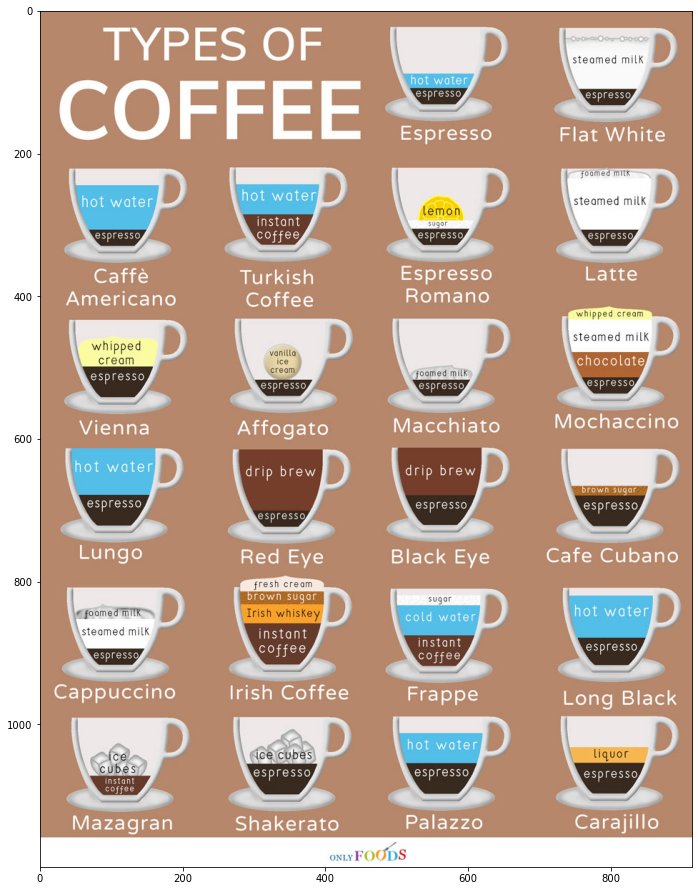

1 : Espresso - 5000 so'm 
2 : Flat_White - 3500 so'm 
3 : Caffe_Americano - 6000 so'm 
4 : Turkish_Coffee - 4500 so'm 
5 : Espresso_Romano - 7000 so'm 
6 : Latte - 3000 so'm 
7 : Vienna - 5500 so'm 
8 : Affogato - 6500 so'm 
9 : Macchiato - 10000 so'm 
10 : Mochaccino - 9500 so'm 
11 : Lungo - 4000 so'm 
12 : Red_Eye - 12000 so'm 
13 : Black_Eye - 12500 so'm 
14 : Cafe_Cubano - 3000 so'm 
15 : Cappuccino - 8000 so'm 
16 : Irish_Coffee - 7000 so'm 
17 : Frappe - 9000 so'm 
18 : Long_Black - 5000 so'm 
19 : Mazagran - 4000 so'm 
20 : Shakerato - 7500 so'm 
21 : Palazzo - 5500 so'm 
22 : Carajillo - 7000 so'm 
23 : Suv - 500 so'm 
Yuqoridagi coffee raqamlaridan birini tanlang Agar coffe olishni istamasangiz 0 ni kiriting : 21
Siz tanlagan coffee narxi : 5500 so'm


In [ ]:

harid = 1
while harid == 1:
    flag = menu()
    if flag:
        cof_id = int(input("Yuqoridagi coffee raqamlaridan birini tanlang Agar coffe olishni istamasangiz 0 ni kiriting : "))
    if flag and cof_id !=0:       
        print(f"Siz tanlagan coffee narxi : {price(cof_id)} so'm")    
        haridor_puli = pul_sorash(price(cof_id))
        x = True
        
    if pul_kam_kop(haridor_puli, cof_id) == 1:
        haridor_puli = savdo(haridor_puli, cof_id)
        x = False   
        
    while haridor_puli > 0:
        while pul_kam_kop(haridor_puli, cof_id) != 1 and x:
            if pul_kam_kop(haridor_puli, cof_id) == 0:
                print(f"Siz tanlagan Coffee ga {price(cof_id)-haridor_puli} so'm pul yetmayapti", end=" ")
                x1 = int(input("Pulingizni qaytaraylikmi --> 1\nPul kiritasizmi --2 \nShu buyruqlardan bittasini tanlang : "))
                while x1!=1 and x2!=2:
                    x1 = int(input("Pulingizni qaytaraylikmi --> 1\nPul kiritasizmi --2 \nShu buyruqlardan bittasini tanlang : "))
                if x1 == 1:
                    haridor_puli = pul_qaytarish(haridor_puli)
                    x5 = True
                    break
                elif x1 == 2:
                    while haridor_puli<price(cof_id):
                        print(f"Siz tanlagan Coffee ga {price(cof_id)-haridor_puli} so'm pul yetmayapti iltimos pul kiriting")
                        haridor_puli += pul_sorash(price(cof_id))
                if x5:
                    break

        while haridor_puli > 0:
            print(f"{haridor_puli} so'm pulingiz ortdi")
            x2 = int(input(f"Yana coffee olasizmi -->1 \nPulingizni qaytaraylikmi -->2 \n Shu buyruqlardan bittasini tanlang : "))
            while x2!=1 and x2!=2:
                x2 = int(input(f"Yana coffee olasizmi -->1 \nPulingizni qaytaraylikmi -->2 \n Shu buyruqlardan bittasini tanlang : "))
            if x2 == 2:
                haridor_puli = pul_qaytarish(haridor_puli)
                if haridor_puli == 0:
                    break
                else:
                    x4 = True
            if x2 == 1 or x4:
                cof_id = ortiqcha_pulga_takliflar(haridor_puli)
                if price(cof_id) > haridor_puli:
                    print(f"Siz tanlagan coffeega {price(cof_id) - haridor_puli} so'm pul yetmayapti!!!")
                    haridor_puli += pul_sorash(price(cof_id))
                haridor_puli = savdo(haridor_puli, cof_id)

        if haridor_puli == 0:
            print("Haridingiz uchun rahmat!")
            harid = int(input("Yana coffee olishni istasangiz 1 ni aks xolsa 0 ni kiriting : "))
            while harid !=1 and harid != 0:
                harid = int(input("Yana coffee olishni istasangiz 1 ni aks xolsa 0 ni kiriting : "))

In [5]:
cof_baza

{'1': ['Espresso', 5000, 9],
 '2': ['Flat_White', 3500, 10],
 '3': ['Caffe_Americano', 6000, 10],
 '4': ['Turkish_Coffee', 4500, 10],
 '5': ['Espresso_Romano', 7000, 10],
 '6': ['Latte', 3000, 10],
 '7': ['Vienna', 5500, 10],
 '8': ['Affogato', 6500, 10],
 '9': ['Macchiato', 10000, 10],
 '10': ['Mochaccino', 9500, 10],
 '11': ['Lungo', 4000, 10],
 '12': ['Red_Eye', 12000, 10],
 '13': ['Black_Eye', 12500, 10],
 '14': ['Cafe_Cubano', 3000, 10],
 '15': ['Cappuccino', 8000, 10],
 '16': ['Irish_Coffee', 7000, 10],
 '17': ['Frappe', 9000, 10],
 '18': ['Long_Black', 5000, 10],
 '19': ['Mazagran', 4000, 10],
 '20': ['Shakerato', 7500, 10],
 '21': ['Palazzo', 5500, 10],
 '22': ['Carajillo', 7000, 10],
 '23': ['Suv', 500, 10]}

In [6]:
pul_baza

{'10000': 11, '5000': 9, '2000': 10, '1000': 10, '500': 10}